In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset


In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


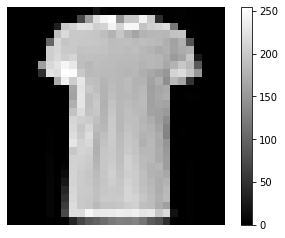

In [9]:
plt.figure()
plt.imshow(train_images[17], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.axis('off')
plt.show()

In [10]:
train_images=train_images/255.0
test_images=test_images/255.0

In [11]:
# create a model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
# training the model
model.fit(train_images, train_labels, epochs=5)  # we pass the data, labels and epochs and watch the magic!


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 250us/sample - loss: 0.2688 - acc: 0.9002
Epoch 2/5
60000/60000 [==============================] - 15s 251us/sample - loss: 0.2582 - acc: 0.9036
Epoch 3/5
60000/60000 [==============================] - 15s 250us/sample - loss: 0.2484 - acc: 0.9077
Epoch 4/5
60000/60000 [==============================] - 15s 252us/sample - loss: 0.2393 - acc: 0.9099
Epoch 5/5
60000/60000 [==============================] - 15s 254us/sample - loss: 0.2327 - acc: 0.9125


In [17]:
# evaluating the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 144us/sample - loss: 0.3226 - acc: 0.8873
Test accuracy: 0.8873


In [19]:
# making the predictions

predictions = model.predict(test_images)

predictions[0]

x=np.argmax(predictions[0])

test_labels[0]
print(predictions[0]) # prediction for each class for image[0]

[5.9857689e-07 3.1868111e-12 4.9964843e-10 1.8909269e-12 1.7860569e-09
 1.8406451e-02 3.2464549e-09 3.3188059e-03 5.8394347e-09 9.7827417e-01]


Pick a number: 78


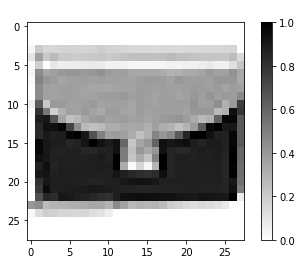

expected= Bag    predicted= Bag


In [26]:
#verifying the predictions
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Excpected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']    
def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]
    show_image(image, class_names[correct_label], predicted_class)
    return(predicted_class)

    




def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
            else:
                print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]

predicted=predict(model, image, label)
print("expected=",class_names[label], "   predicted=",predicted )